### SQuAD Dataset Exploratory Data Analysis (EDA)

#### By Group 3:

| Name       | ID   |
|------------|------|
| Muhammad Affan Naved      | 25100283  |
| Hassan Ali        | 25100037  |
| Talha Tariq    | 25100041  |


#### Import libraries

In [1]:
# Libraries needed for preprocessing and eda on SQuAD dataset
import pandas as pd # squad is in csv format with columns [index,question,context,answer_start,text,c_id]
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import spacy
import string
import nltk
from nltk.corpus import stopwords


#### Load dataset

In [2]:
input_pth = '/kaggle/input/dm-dataset/DM_Dataset/v1.1/train.csv'

# Load the dataset
df = pd.read_csv(input_pth)
df.head()

,index,question,context,answer_start,text,c_id
0,5733be284776f41900661182,To whom did the Virgin Mary allegedly appear i...,"Architecturally, the school has a Catholic cha...",515,Saint Bernadette Soubirous,0
1,5733be284776f4190066117f,What is in front of the Notre Dame Main Building?,"Architecturally, the school has a Catholic cha...",188,a copper statue of Christ,0
2,5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame...,"Architecturally, the school has a Catholic cha...",279,the Main Building,0
3,5733be284776f41900661181,What is the Grotto at Notre Dame?,"Architecturally, the school has a Catholic cha...",381,a Marian place of prayer and reflection,0
4,5733be284776f4190066117e,What sits on top of the Main Building at Notre...,"Architecturally, the school has a Catholic cha...",92,a golden statue of the Virgin Mary,0


### Prepocessing the Dataset

In [3]:
#Preprocessing

# Rename columns for readability

df.rename(columns={"text": "answer", "c_id": "context_id"}, inplace=True)

# Display first few rows
df.head()


,index,question,context,answer_start,answer,context_id
0,5733be284776f41900661182,To whom did the Virgin Mary allegedly appear i...,"Architecturally, the school has a Catholic cha...",515,Saint Bernadette Soubirous,0
1,5733be284776f4190066117f,What is in front of the Notre Dame Main Building?,"Architecturally, the school has a Catholic cha...",188,a copper statue of Christ,0
2,5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame...,"Architecturally, the school has a Catholic cha...",279,the Main Building,0
3,5733be284776f41900661181,What is the Grotto at Notre Dame?,"Architecturally, the school has a Catholic cha...",381,a Marian place of prayer and reflection,0
4,5733be284776f4190066117e,What sits on top of the Main Building at Notre...,"Architecturally, the school has a Catholic cha...",92,a golden statue of the Virgin Mary,0


In [4]:
# Check for duplicates
print(f"Duplicates before removal: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

# Check again
print(f"Duplicates after removal: {df.duplicated().sum()}")


Duplicates before removal: 0
Duplicates after removal: 0


In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Confirm removal
print(df.isnull().sum())


index           0
question        0
context         0
answer_start    0
answer          3
context_id      0
dtype: int64
index           0
question        0
context         0
answer_start    0
answer          0
context_id      0
dtype: int64


In [6]:
# Convert text to lowercase and strip unnecessary spaces
df["question"] = df["question"].str.lower().str.strip()
df["context"] = df["context"].str.lower().str.strip()
df["answer"] = df["answer"].str.lower().str.strip()

# Display first few rows
df.head()

,index,question,context,answer_start,answer,context_id
0,5733be284776f41900661182,to whom did the virgin mary allegedly appear i...,"architecturally, the school has a catholic cha...",515,saint bernadette soubirous,0
1,5733be284776f4190066117f,what is in front of the notre dame main building?,"architecturally, the school has a catholic cha...",188,a copper statue of christ,0
2,5733be284776f41900661180,the basilica of the sacred heart at notre dame...,"architecturally, the school has a catholic cha...",279,the main building,0
3,5733be284776f41900661181,what is the grotto at notre dame?,"architecturally, the school has a catholic cha...",381,a marian place of prayer and reflection,0
4,5733be284776f4190066117e,what sits on top of the main building at notre...,"architecturally, the school has a catholic cha...",92,a golden statue of the virgin mary,0


### Remove stopwords, punctuation and special characters.

Assigning them to a new column

In [ ]:
#remove stopwords, punctuation and special characters
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df["question_clean"] = df["question"].apply(clean_text)
df["context_clean"] = df["context"].apply(clean_text)
df["answer_clean"] = df["answer"].apply(clean_text)

df.head()

,index,question,context,answer_start,answer,context_id,question_clean,context_clean,answer_clean
0,5733be284776f41900661182,to whom did the virgin mary allegedly appear i...,"architecturally, the school has a catholic cha...",515,saint bernadette soubirous,0,virgin mary allegedly appear 1858 lourdes france,architecturally school catholic character atop...,saint bernadette soubirous
1,5733be284776f4190066117f,what is in front of the notre dame main building?,"architecturally, the school has a catholic cha...",188,a copper statue of christ,0,front notre dame main building,architecturally school catholic character atop...,copper statue christ
2,5733be284776f41900661180,the basilica of the sacred heart at notre dame...,"architecturally, the school has a catholic cha...",279,the main building,0,basilica sacred heart notre dame beside structure,architecturally school catholic character atop...,main building
3,5733be284776f41900661181,what is the grotto at notre dame?,"architecturally, the school has a catholic cha...",381,a marian place of prayer and reflection,0,grotto notre dame,architecturally school catholic character atop...,marian place prayer reflection
4,5733be284776f4190066117e,what sits on top of the main building at notre...,"architecturally, the school has a catholic cha...",92,a golden statue of the virgin mary,0,sits top main building notre dame,architecturally school catholic character atop...,golden statue virgin mary


In [8]:
# Tokenize and lemmatize text
# Takes too long.
# nlp = spacy.load("en_core_web_sm")

# def lemmatize_text(text):
#     doc = nlp(text)
#     text = " ".join(token.lemma_ for token in doc)
#     return text

# df["question_lemma"] = df["question_clean"].apply(lemmatize_text)
# df["context_lemma"] = df["context_clean"].apply(lemmatize_text)
# df["answer_lemma"] = df["answer_clean"].apply(lemmatize_text)

# df.head()

### EDA

#### Overview

In [9]:
#Dataset Overview

print(f"Shape of the dataset: {df.shape}")
print(f"Columns: {df.columns}")
print(f"\nData types: {df.dtypes}")
print(f"\nNumber of unique values in each column: {df.nunique()}")

Shape of the dataset: (87596, 9)
Columns: Index(['index', 'question', 'context', 'answer_start', 'answer', 'context_id',
       'question_clean', 'context_clean', 'answer_clean'],
      dtype='object')

Data types: index             object
question          object
context           object
answer_start       int64
answer            object
context_id         int64
question_clean    object
context_clean     object
answer_clean      object
dtype: object

Number of unique values in each column: index             87596
question          87309
context           18891
answer_start       1604
answer            64261
context_id        18891
question_clean    87085
context_clean     18889
answer_clean      61428
dtype: int64


#### Length Distribution Analysis

In [10]:
# Length of each column (word count)
df["question_length"] = df["question"].apply(lambda x: len(x.split()))
df["context_length"] = df["context"].apply(lambda x: len(x.split()))
df["answer_length"] = df["answer"].apply(lambda x: len(x.split()))

# Summary statistics
display(df[["question_length", "context_length", "answer_length"]].describe())

,question_length,context_length,answer_length
count,87596.000000,87596.000000,87596.000000
mean,10.061064,119.762832,3.162233
std,3.559231,49.365597,3.392368
min,1.000000,20.000000,1.000000
25%,8.000000,89.000000,1.000000
50%,10.000000,110.000000,2.000000
75%,12.000000,142.000000,3.000000
max,40.000000,653.000000,43.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


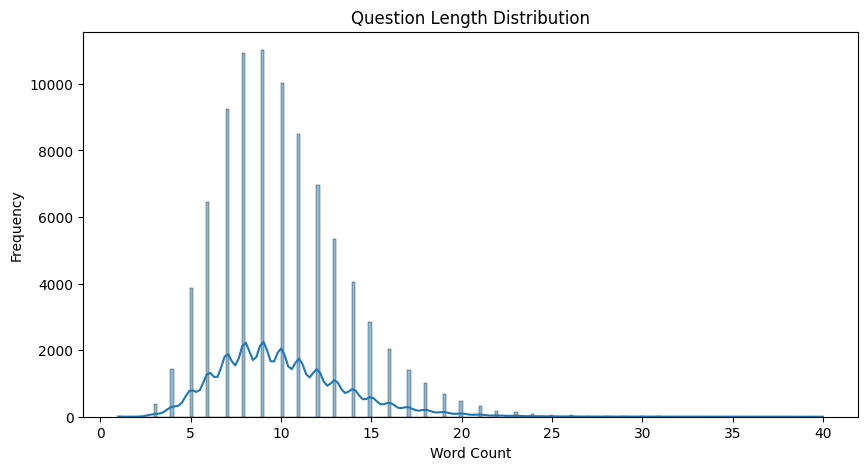

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


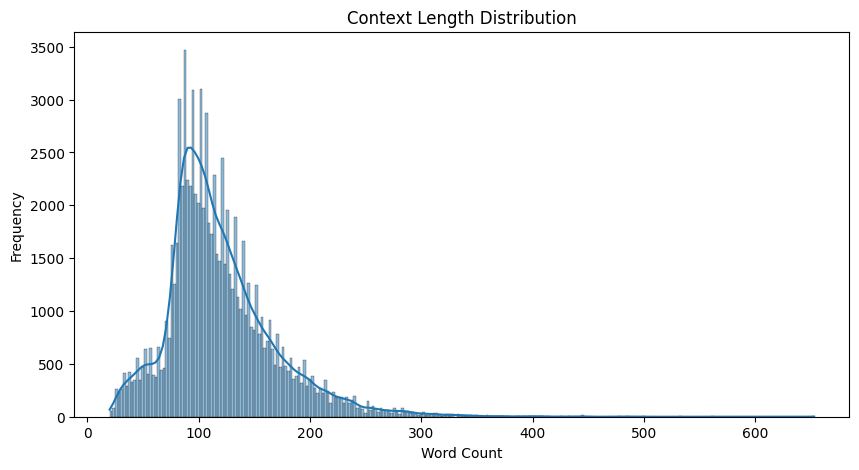

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


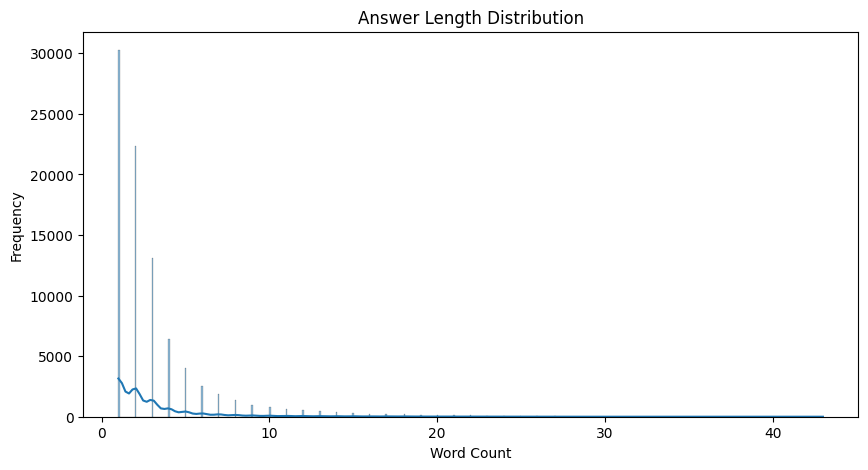

In [11]:
# Question Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["question_length"], kde=True)
plt.title("Question Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Context Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["context_length"], kde=True)
plt.title("Context Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Answer Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["answer_length"], kde=True)
plt.title("Answer Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

#### Get the Top N frequent words in Context, Questions, and Answers Columns and plot their word clouds.

In [12]:
#get top 20 most common words in the context, question and answer and make a word cloud

def get_top_n_words(texts, n=20):
    words = " ".join(texts).split()
    return Counter(words).most_common(n)

top_words_contexts = get_top_n_words(df["context_clean"])
top_words_questions = get_top_n_words(df["question_clean"])
top_words_answers = get_top_n_words(df["answer_clean"])

print("\nTop Words in Questions:\n", top_words_questions)
print("\nTop Words in Contexts:\n", top_words_contexts)
print("\nTop Words in Answers:\n", top_words_answers)


Top Words in Questions:
 [('many', 5595), ('year', 3427), ('first', 2821), ('name', 2819), ('type', 2137), ('used', 2131), ('new', 1925), ('city', 1729), ('people', 1619), ('one', 1338), ('two', 1329), ('called', 1327), ('much', 1258), ('use', 1238), ('war', 1123), ('us', 1108), ('time', 1080), ('located', 1038), ('country', 971), ('group', 970)]

Top Words in Contexts:
 [('also', 27360), ('new', 21103), ('first', 20979), ('one', 20848), ('city', 17894), ('many', 15584), ('two', 14106), ('states', 14045), ('used', 13421), ('may', 12908), ('time', 12779), ('state', 12288), ('united', 12152), ('world', 12059), ('century', 11564), ('war', 11448), ('would', 11148), ('years', 10140), ('including', 10045), ('known', 10042)]

Top Words in Answers:
 [('million', 883), ('new', 607), ('century', 601), ('two', 569), ('one', 511), ('united', 504), ('years', 463), ('three', 455), ('war', 425), ('states', 424), ('world', 383), ('state', 357), ('four', 338), ('national', 335), ('john', 334), ('may',

#### Wordcloud Visualization (excluding stopwords)

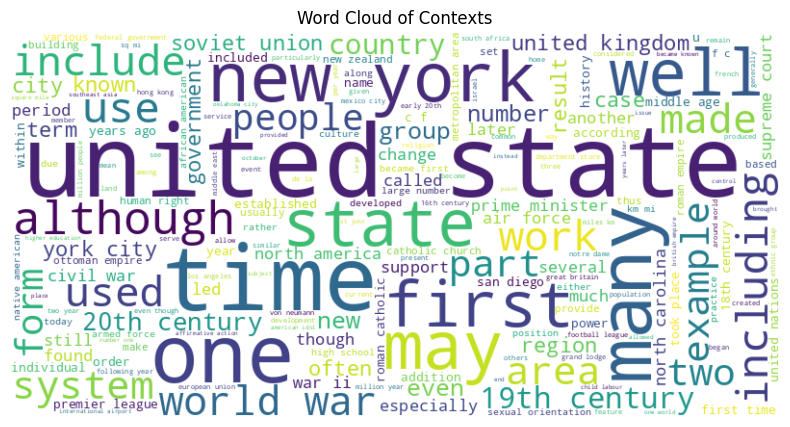

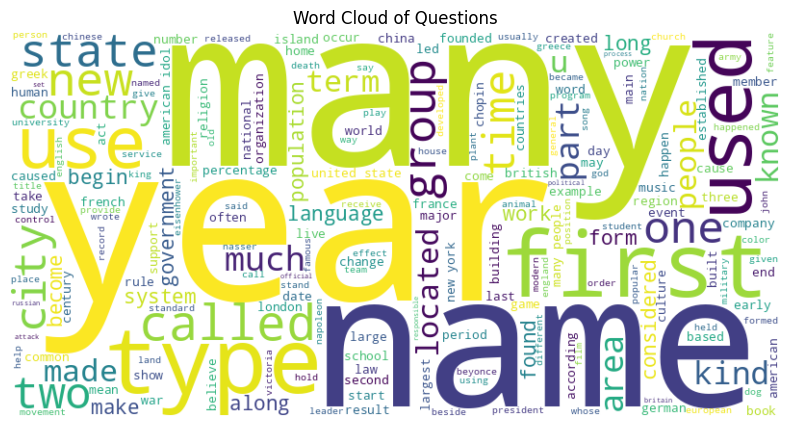

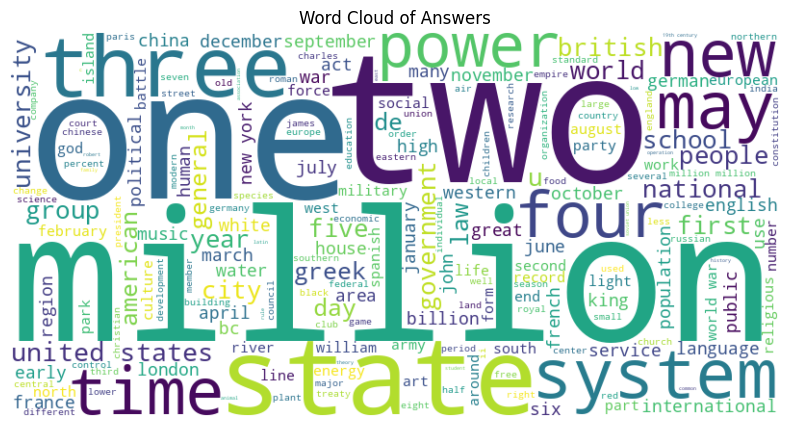

In [13]:
#Plot the following visualizations for the top words in the context, question and answer:
# 1. Word Cloud
# 2. Bar Plot

def plot_word_cloud(texts, title):
    text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_word_cloud(df["context_clean"], "Word Cloud of Contexts")
plot_word_cloud(df["question_clean"], "Word Cloud of Questions")
plot_word_cloud(df["answer_clean"], "Word Cloud of Answers")

#### Plot the barplot visualization of the Top 20 Frequent words

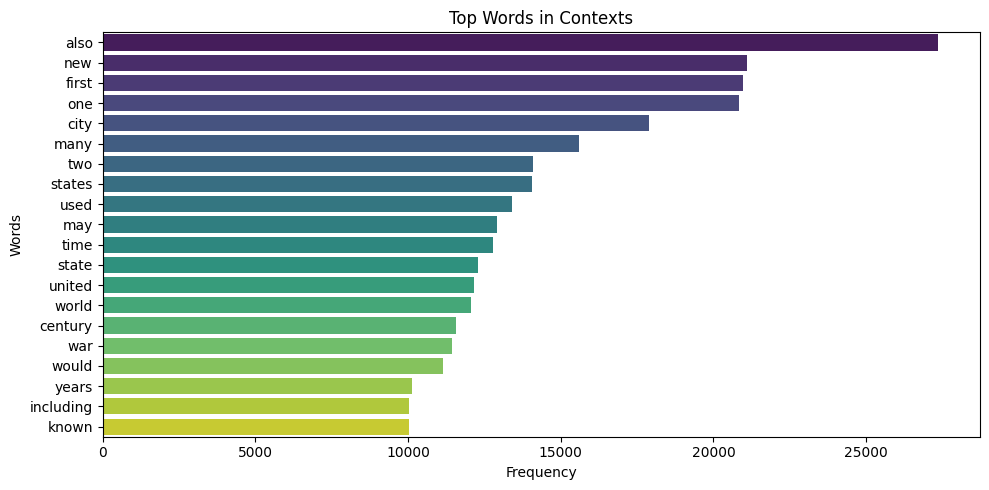

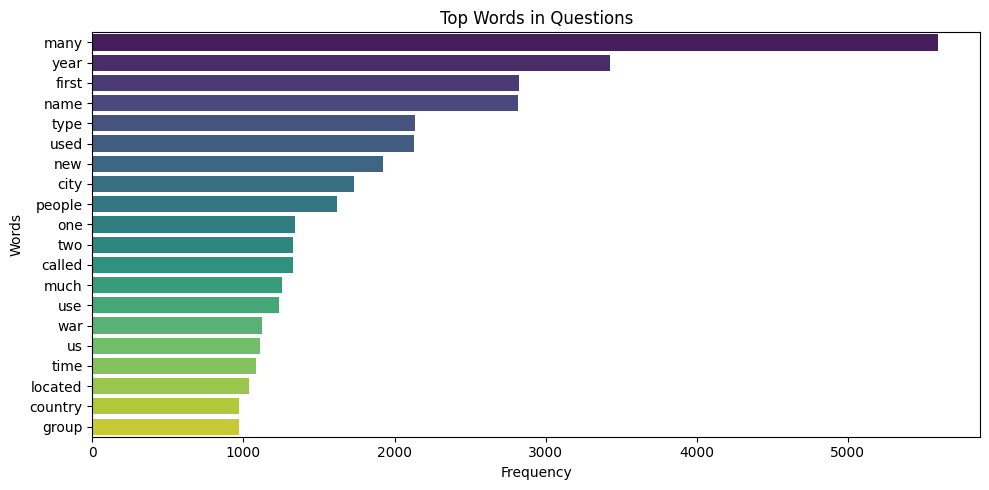

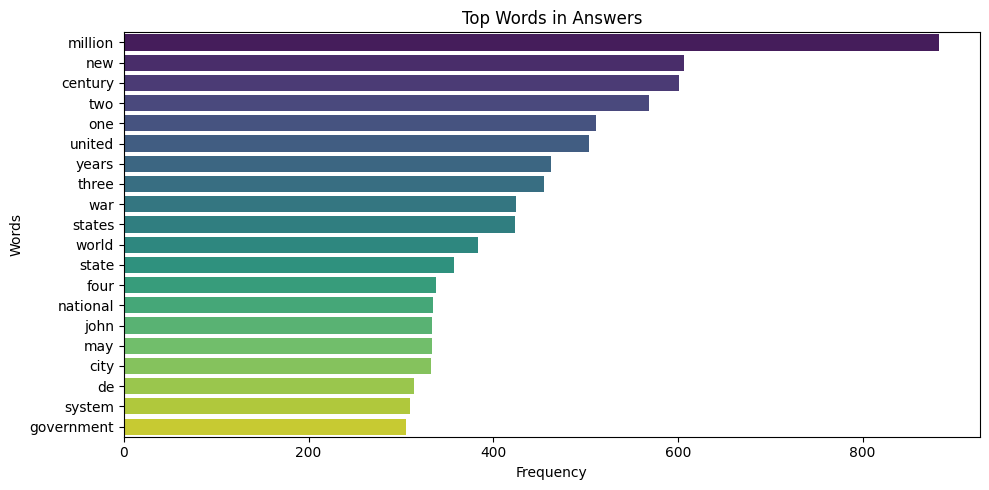

In [14]:
def plot_barplot(words, title):
    if not words:
        print(f"No words to plot for {title}")
        return
    
    # Create a DataFrame for seaborn
    df_plot = pd.DataFrame(words, columns=['word', 'count'])
    
    plt.figure(figsize=(10, 5))
    # Use seaborn barplot
    sns.barplot(x='count', y='word', data=df_plot, palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

# Plot the visualizations
plot_barplot(top_words_contexts, "Top Words in Contexts")
plot_barplot(top_words_questions, "Top Words in Questions")
plot_barplot(top_words_answers, "Top Words in Answers")

#### Identify the different Question types and visualize their frequencies

question_type
what     50461
how       9389
who       8793
which     6082
when      5697
where     3715
other     1585
why       1227
whom       345
whose      302
Name: count, dtype: int64

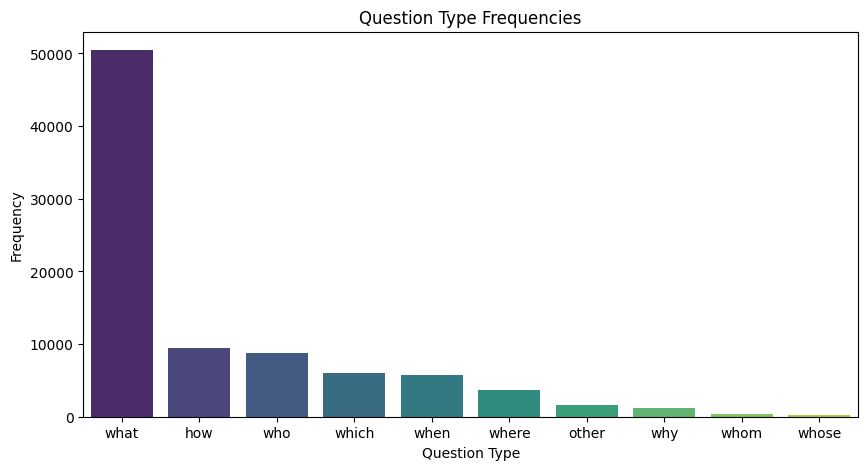

In [15]:
# Identify the different Question types and visualize their frequencies
# Questions are those which contain the following words: who, what, when, where, why, how, which, whom, whose


def get_question_type(text):
    # Define a regex pattern to match the question words
    pattern = r'\b(who|what|when|where|why|how|which|whom|whose)\b'
    
    # Search for a match in the text (case insensitive)
    match = re.search(pattern, text.lower())
    
    # If a match is found, return the first matched word, else return 'other'
    if match:
        return match.group(0)
    return "other"

# Apply the function to the 'question' column
df["question_type"] = df["question"].apply(get_question_type)

# Question Type Frequencies
question_type_counts = df["question_type"].value_counts()

display(question_type_counts)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=question_type_counts.index, y=question_type_counts.values, palette="viridis")
plt.title("Question Type Frequencies")
plt.xlabel("Question Type")
plt.ylabel("Frequency")
plt.show()
